In [1]:
from scipy import *
import random
import matplotlib.pyplot as plt
%matplotlib inline

# Voronoi tessellations by brute force
#### Tan Beng Hau, Cavitation Lab

A Voronoi tessellation partitions a set of points into cells. Essentially, all the lines on the diagram are equidistant from their source points.

There are a number of ways to generate Voronoi tessellations, some of which can be rather sophisticated, *e.g.* the Fortune algorithm. Also, there already are C++ libraries that can perform all sorts of algorithms, including the two that we will show in this notebook, such as [CGAL](http://cgal.org). 

Another type of Voronoi tessellation allows the additive weighting of the points -- the Apollonius diagram. The Apollonius diagram is a rather important application of the Voronoi tessellations because real life objects have a finite size. The standard Voronoi tessellation ignores the size of the points, so, for example, the partitioning of sand particles would not be effectively calculated in a standard Voronoi tessellation.

A simpler way to achieve the same result is by using brute force. Not pretty, but it works, and we can improve it to an arbitrarily fine accuracy by increasing the number of grid points that we work with.  

### The standard Voronoi tessellation

In the standard tessellation, we essentially keep track of the nearest point between every pair of points $(x,y)$ and colour the region that surrounds every point. The distances are tracked by the Euclidean distance metric $d(x,y) = \sqrt{(x-x_i)^2 + (y-y_i)^2}$. 

The particular points that we are using here are from a distribution of surface-attached bubbles in an experiment. 

(0, 232)

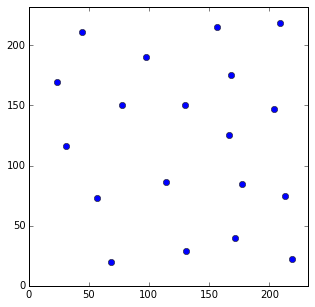

In [2]:
"""
Generate the points for the Voronoi tessellation
"""

L = 232

px = [19.5, 29.0, 39.5, 22.5, 73, 86, 84.5, 75, 147, 218.7, 125.5, 175, 150, 190.5, 150.5, 116, 169.5, 211, 215.3]
py = [68.5, 131, 171.5, 218.5, 57, 114, 177.5, 213, 204, 208.5, 166.5, 168, 130, 97.5, 77.5, 31, 23.5, 44, 156.6]
pr = [17.6, 27.01, 22.05, 12.48, 11.06, 15.10, 12.48, 18.92, 18.92, 15.05, 10.54, 13.11, 11.06, 14.55, 17.60, 25.08, 22.55, 21.08, 17.52]
    
plt.figure(figsize=(5,5))
plt.plot(py,px,'o')
plt.xlim([0, L])
plt.ylim([0, L])


In [3]:
def closest(x,y, px, py):
    closestPoint = None
    distance = None
    for i in range(len(px)):
        d = sqrt((px[i] - x)**2 + (py[i]-y)**2)
        if d==0: return i, 0
        if d < distance or not distance:
            closestPoint = i
            distance = d
    return closestPoint, distance

In [4]:
closestPoint = closest(100,100,px,py)[0]
print px[closestPoint], py[closestPoint]

86 114


In [4]:
def createOutputImage(px, py, L):
    outputImage = zeros((L, L))
    for i in range(L):
        for j in range(L):
            c, d = closest(i, j, px, py)
            outputImage[i,j] = c
    return outputImage

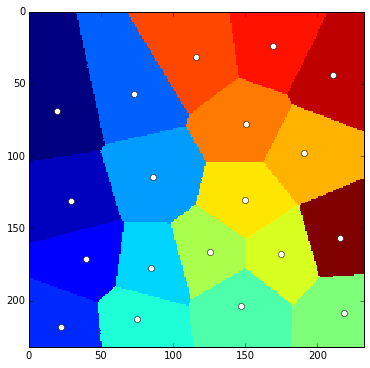

In [5]:
outputImage = createOutputImage(py,px, L)
            
plt.figure(figsize=(6,6))
plt.pcolor(outputImage)
plt.xlim([0, L])
plt.ylim([0, L])
plt.gca().invert_yaxis()

for i in range(len(pr)):
    plt.plot(px[i],py[i],'wo')

### The additively weighted Voronoi tessellation

In the additively weighted Voronoi tessellation each point has a given weight, with which we shift the Euclidean metric. Here, the lines are equidistant between the circumferences of the points, rather than their midpoints (in the case of the standard Voronoi tessellation). 

In [9]:
def closest_apollonius(x,y, px, py):
    closestPoint = None
    distance = None
    for i in range(len(px)):
        d = sqrt((px[i] - x)**2 + (py[i]-y)**2) - pr[i]
        if d==0: return i, 0
        if d < distance or not distance:
            closestPoint = i
            distance = d
    return closestPoint, distance

In [10]:
def createOutputImageApollonius(px, py, L):
    outputImage = zeros((L, L))
    for i in range(L):
        for j in range(L):
            c, d = closest_apollonius(i, j, px, py)
            outputImage[i,j] = c
    return outputImage

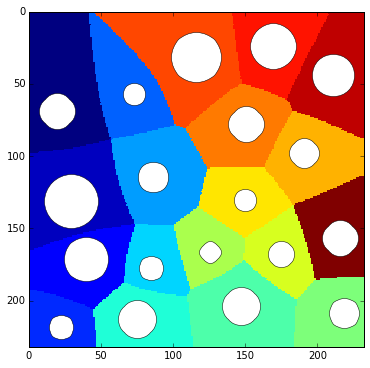

In [11]:
outputImage = createOutputImageApollonius(py,px, L)
            
plt.figure(figsize=(6,6))
plt.pcolor(outputImage)
plt.xlim([0, L])
plt.ylim([0, L])
plt.gca().invert_yaxis()


for i in range(len(pr)):
    plt.plot(px[i],py[i],'wo', markersize=2*pr[i])